### Import Libraries & Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import seaborn as sns
import keras
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

#### Import keras models 

In [2]:
#import various components for model building 
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model 
from keras.optimizers import RMSprop 

#import backend 
from keras import backend as K 

#### Import Data

In [3]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

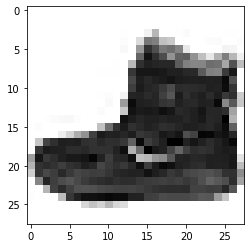

In [5]:
plt.imshow(X_train[0], cmap = plt.cm.binary)
plt.show()

## Convulutional Neural Networks

### Prepare Data for modeling

In [6]:
#set data to float for type consistency 
X_train = np.array(X_train, dtype='float32')
X_test = np.array(X_test, dtype='float32')

#normalize data
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (60000, 28, 28)
X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)


In [13]:
#convert to binary class matrices
y_train = keras.utils.normalize(y_train, axis=1)
y_test = keras.utils.normalize(y_test, axis=1)

### First Implementation

In [14]:
def tf_model():
    model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')])
    model.compile(optimizer='adam', 
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model 

In [16]:
#train and fit model 
model = tf_model()

first = model.fit(X_train, y_train, 
                  batch_size=128, 
                  epochs=10, 
                  verbose=1, 
                  validation_data=(X_test, y_test))
Score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', Score[0])
print('Test accuracy:', Score[1])

Epoch 1/10
469/469 [==============================] - 1s 1ms/step - loss: 0.5462 - accuracy: 0.8130 - val_loss: 0.4524 - val_accuracy: 0.8432
Epoch 2/10
469/469 [==============================] - 1s 1ms/step - loss: 0.4031 - accuracy: 0.8599 - val_loss: 0.4194 - val_accuracy: 0.8559
Epoch 3/10
469/469 [==============================] - 1s 1ms/step - loss: 0.3705 - accuracy: 0.8681 - val_loss: 0.3931 - val_accuracy: 0.8611
Epoch 4/10
469/469 [==============================] - 1s 1ms/step - loss: 0.3392 - accuracy: 0.8782 - val_loss: 0.4054 - val_accuracy: 0.8563
Epoch 5/10
469/469 [==============================] - 1s 1ms/step - loss: 0.3241 - accuracy: 0.8839 - val_loss: 0.3795 - val_accuracy: 0.8665
Epoch 6/10
469/469 [==============================] - 1s 1ms/step - loss: 0.3059 - accuracy: 0.8899 - val_loss: 0.3579 - val_accuracy: 0.8705
Epoch 7/10
469/469 [==============================] - 1s 1ms/step - loss: 0.2962 - accuracy: 0.8921 - val_loss: 0.3447 - val_accuracy: 0.8750
Epoch 

The test accuracy is 87%, not bad for the first try

### Second Implementation

In [27]:
def tf_model_2():
    model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')])
    model.compile(optimizer='adam', 
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model 

In [42]:
#train and fit model 
model = tf_model_2()
second = model.fit(X_train, y_train, 
                  batch_size=128, 
                  epochs=10, 
                  verbose=1, 
                  validation_data=(X_test, y_test))
Score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', Score[0])
print('Test accuracy:', Score[1])

model.summary()

Epoch 1/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0940 - accuracy: 0.8084 - val_loss: 0.0782 - val_accuracy: 0.8471
Epoch 2/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0707 - accuracy: 0.8579 - val_loss: 0.0703 - val_accuracy: 0.8573
Epoch 3/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0642 - accuracy: 0.8707 - val_loss: 0.0686 - val_accuracy: 0.8609
Epoch 4/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0598 - accuracy: 0.8792 - val_loss: 0.0647 - val_accuracy: 0.8723
Epoch 5/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0561 - accuracy: 0.8863 - val_loss: 0.0647 - val_accuracy: 0.8695
Epoch 6/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0536 - accuracy: 0.8915 - val_loss: 0.0637 - val_accuracy: 0.8699
Epoch 7/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0520 - accuracy: 0.8943 - val_loss: 0.0610 - val_accuracy: 0.8772
Epoch 

### Third Implementation

In [31]:
def tf_model_3():
    model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')])
    model.compile(optimizer='RMSprop', 
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model 

In [48]:
#train and fit model 
model = tf_model_3()
third = model.fit(X_train, y_train, 
                  batch_size=128, 
                  epochs=10, 
                  verbose=1, 
                  validation_data=(X_test, y_test))
Score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', Score[0])
print('Test accuracy:', Score[1])

model.summary()

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0985 - accuracy: 0.7970 - val_loss: 0.0805 - val_accuracy: 0.8372
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0724 - accuracy: 0.8524 - val_loss: 0.0757 - val_accuracy: 0.8407
Epoch 3/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0645 - accuracy: 0.8677 - val_loss: 0.0666 - val_accuracy: 0.8650
Epoch 4/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0598 - accuracy: 0.8778 - val_loss: 0.0649 - val_accuracy: 0.8661
Epoch 5/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0563 - accuracy: 0.8856 - val_loss: 0.0625 - val_accuracy: 0.8737
Epoch 6/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0537 - accuracy: 0.8917 - val_loss: 0.0640 - val_accuracy: 0.8681
Epoch 7/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0515 - accuracy: 0.8959 - val_loss: 0.0606 - val_accuracy: 0.8750
Epoch 

### Fourth Implementation

In [49]:
def tf_model_4():
    model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')])
    model.compile(optimizer='RMSprop', 
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model 

In [50]:
#train and fit model 
model = tf_model_4()
fourth = model.fit(X_train, y_train, 
                  batch_size=128, 
                  epochs=10, 
                  verbose=1, 
                  validation_data=(X_test, y_test))
Score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', Score[0])
print('Test accuracy:', Score[1])

model.summary()

Epoch 1/10
469/469 [==============================] - 1s 1ms/step - loss: 0.5756 - accuracy: 0.7996 - val_loss: 0.4599 - val_accuracy: 0.8365
Epoch 2/10
469/469 [==============================] - 1s 1ms/step - loss: 0.4114 - accuracy: 0.8518 - val_loss: 0.4325 - val_accuracy: 0.8418
Epoch 3/10
469/469 [==============================] - 1s 1ms/step - loss: 0.3634 - accuracy: 0.8677 - val_loss: 0.4213 - val_accuracy: 0.8492
Epoch 4/10
469/469 [==============================] - 1s 1ms/step - loss: 0.3340 - accuracy: 0.8775 - val_loss: 0.3958 - val_accuracy: 0.8573
Epoch 5/10
469/469 [==============================] - 1s 1ms/step - loss: 0.3152 - accuracy: 0.8843 - val_loss: 0.3501 - val_accuracy: 0.8772
Epoch 6/10
469/469 [==============================] - 1s 1ms/step - loss: 0.2992 - accuracy: 0.8897 - val_loss: 0.3536 - val_accuracy: 0.8754
Epoch 7/10
469/469 [==============================] - 1s 1ms/step - loss: 0.2847 - accuracy: 0.8967 - val_loss: 0.3571 - val_accuracy: 0.8744
Epoch 

### Fifth Implementation

In [51]:
def tf_model_5():
    model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')])
    model.compile(optimizer='RMSprop', 
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model 

In [53]:
#train and fit model 
model = tf_model_5()
fourth = model.fit(X_train, y_train, 
                  batch_size=128, 
                  epochs=10, 
                  verbose=1, 
                  validation_data=(X_test, y_test))
Score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', Score[0])
print('Test accuracy:', Score[1])

model.summary()

Epoch 1/10
469/469 [==============================] - 1s 1ms/step - loss: 0.6238 - accuracy: 0.7833 - val_loss: 0.5283 - val_accuracy: 0.8070
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.4346 - accuracy: 0.8457 - val_loss: 0.4436 - val_accuracy: 0.8420
Epoch 3/10
469/469 [==============================] - 1s 1ms/step - loss: 0.3843 - accuracy: 0.8618 - val_loss: 0.4808 - val_accuracy: 0.8222
Epoch 4/10
469/469 [==============================] - 1s 1ms/step - loss: 0.3537 - accuracy: 0.8741 - val_loss: 0.3804 - val_accuracy: 0.8649
Epoch 5/10
469/469 [==============================] - 1s 1ms/step - loss: 0.3290 - accuracy: 0.8807 - val_loss: 0.4180 - val_accuracy: 0.8482
Epoch 6/10
469/469 [==============================] - 1s 1ms/step - loss: 0.3115 - accuracy: 0.8871 - val_loss: 0.4094 - val_accuracy: 0.8520
Epoch 7/10
469/469 [==============================] - 1s 1ms/step - loss: 0.2970 - accuracy: 0.8912 - val_loss: 0.3711 - val_accuracy: 0.8685
Epoch 